### Global Trends in Air Pollution–Related Deaths (2010–2020)

#### Data Import

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = "data.csv"
air_pollution_data = pd.read_csv(dataset_path)
print("Dataset shape:", air_pollution_data.shape)
air_pollution_data.head(2)

Dataset shape: (30000, 34)


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,AIR_35,Joint effects of air pollution attributable de...,numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,16250.0,NaN,28269.0,22 077 [16 250-28 269],NaN,NaN,EN,2024-10-03 00:00:00
1,AIR_35,Joint effects of air pollution attributable de...,numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,9248.0,NaN,17161.0,13 163 [9248-17 161],NaN,NaN,EN,2024-10-03 00:00:00


#### Data cleaning

In [184]:
cols = ["ParentLocation","Location","SpatialDimValueCode","Period","Dim1",
        "FactValueNumeric","FactValueNumericLow","FactValueNumericHigh",
        "Indicator","IsLatestYear"]

pollution_data = air_pollution_data[cols].rename(columns={
    "ParentLocation":"Region","Location":"Country","SpatialDimValueCode":"Country_Code",
    "Dim1":"Gender","FactValueNumeric":"Deaths","FactValueNumericLow":"Deaths_Low",
    "FactValueNumericHigh":"Deaths_High","Indicator":"Indicator_Name","IsLatestYear":"Latest_Year"
})

pollution_data = pollution_data.query("2000 <= Period <= 2020").dropna(subset=["Deaths"]).drop_duplicates()
pollution_data[["Region","Country","Gender","Indicator_Name"]] = pollution_data[["Region","Country","Gender","Indicator_Name"]].apply(lambda x: x.str.strip().str.title())

print("Data after cleaning:", pollution_data.shape)
pollution_data.head()


Data after cleaning: (30000, 10)


,Region,Country,Country_Code,Period,Gender,Deaths,Deaths_Low,Deaths_High,Indicator_Name,Latest_Year
0,Africa,Angola,AGO,2019,Both Sexes,22077.0,16250.0,28269.0,Joint Effects Of Air Pollution Attributable De...,True
1,Africa,Angola,AGO,2019,Both Sexes,13163.0,9248.0,17161.0,Joint Effects Of Air Pollution Attributable De...,True
2,Africa,Angola,AGO,2019,Both Sexes,181.6,126.0,241.2,Joint Effects Of Air Pollution Attributable De...,True
3,Africa,Angola,AGO,2019,Both Sexes,4148.0,2782.0,5420.0,Joint Effects Of Air Pollution Attributable De...,True
4,Africa,Angola,AGO,2019,Both Sexes,3477.0,1967.0,5401.0,Joint Effects Of Air Pollution Attributable De...,True


In [ ]:
print("Years in data:", sorted(pollution_data["Period"].unique()))
print("\nRecords per region:\n", pollution_data["Region"].value_counts())
print("\nUnique years per region:\n", pollution_data.groupby("Region")["Period"].nunique())
print("\nGlobal deaths summary:\n", pollution_data["Deaths"].describe())


Years in data: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

Records per region:
 Region
Europe                   8820
Africa                   8460
Americas                 5940
Eastern Mediterranean    3420
South-East Asia          1800
Western Pacific          1560
Name: count, dtype: int64

Unique years per region:
 Region
Africa                   10
Americas                 10
Eastern Mediterranean    10
Europe                   10
South-East Asia          10
Western Pacific          10
Name: Period, dtype: int64

Global deaths summary:
 count    3.000000e+04
mean     8.937676e+03
std      6.248332e+04
min      0.000000e+00
25%      9.625500e+01
50%      6.362000e+02
75%      3.230250e+03
max      2.021215e+06
Name: Deaths, dtype: float64


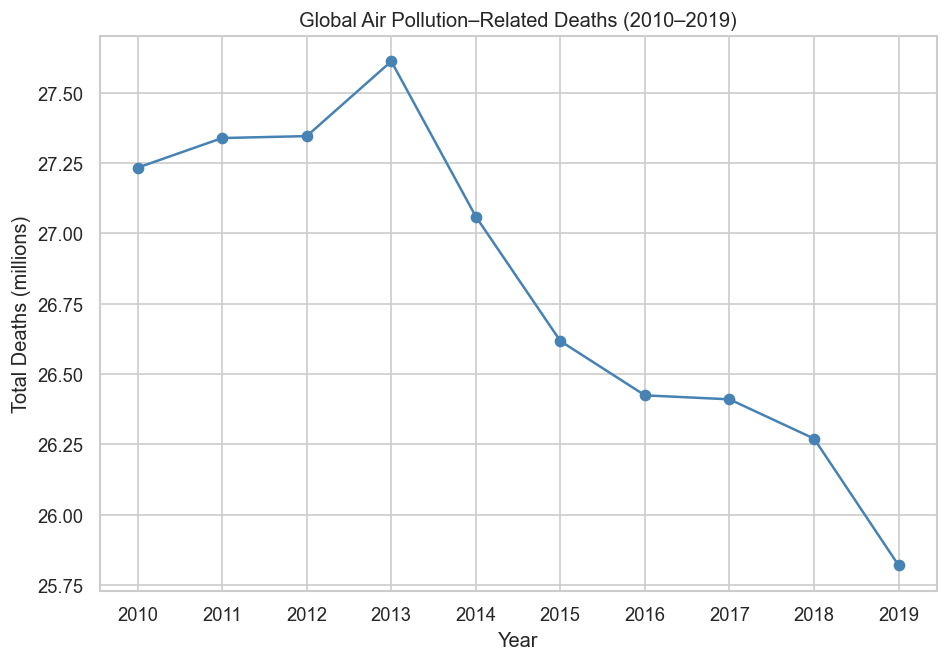

In [186]:
plt.figure(figsize=(9,6))
plt.plot(yearly_total.index, yearly_total.values / 1_000_000, marker="o", color="steelblue")
plt.title("Global Air Pollution–Related Deaths (2010–2019)")
plt.xlabel("Year")
plt.ylabel("Total Deaths (millions)")
plt.xticks(yearly_total.index)
plt.grid(True)
plt.show()




#### Which regions have experienced the largest rise or fall in air-pollution-related deaths between 2010 and 2019?

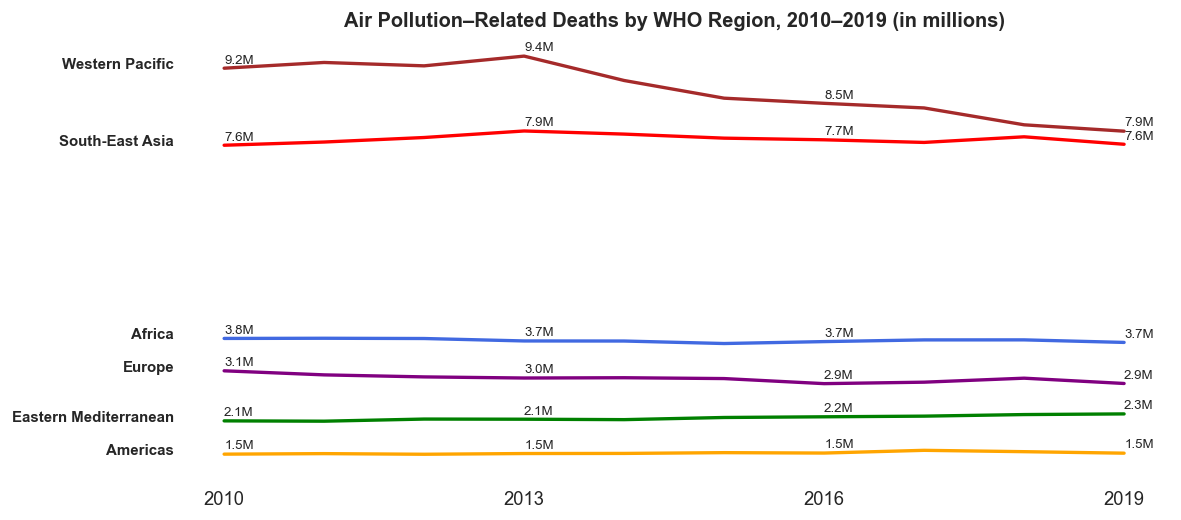

In [122]:
import matplotlib.pyplot as plt

data = pollution_data.groupby(["Region", "Period"])["Deaths"].sum().reset_index()
data = data[data["Region"].isin(["Africa", "Americas", "Europe", "Eastern Mediterranean", "South-East Asia", "Western Pacific"])]
data["Deaths"] /= 1_000_000
colors = ["royalblue", "orange", "green", "purple", "red", "brown"]

plt.figure(figsize=(10,4.5))
for region, color in zip(data["Region"].unique(), colors):
    d = data[data["Region"] == region]
    plt.plot(d["Period"], d["Deaths"], color=color, linewidth=2)
    for x, y in zip(d["Period"], d["Deaths"]):
        if x in [2010, 2013, 2016, 2019]:
            plt.text(x, y + 0.05, f"{y:.1f}M", fontsize=8, ha="left", va="bottom")
    plt.text(d["Period"].min() - 0.5, d["Deaths"].iloc[0], region, fontsize=9, fontweight="bold", ha="right")

plt.title("Air Pollution–Related Deaths by WHO Region, 2010–2019 (in millions)", fontsize=12, fontweight="bold")
plt.xticks([2010, 2013, 2016, 2019])
plt.yticks([])
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()



#### Which countries currently report the highest and lowest numbers of deaths caused by air pollution?


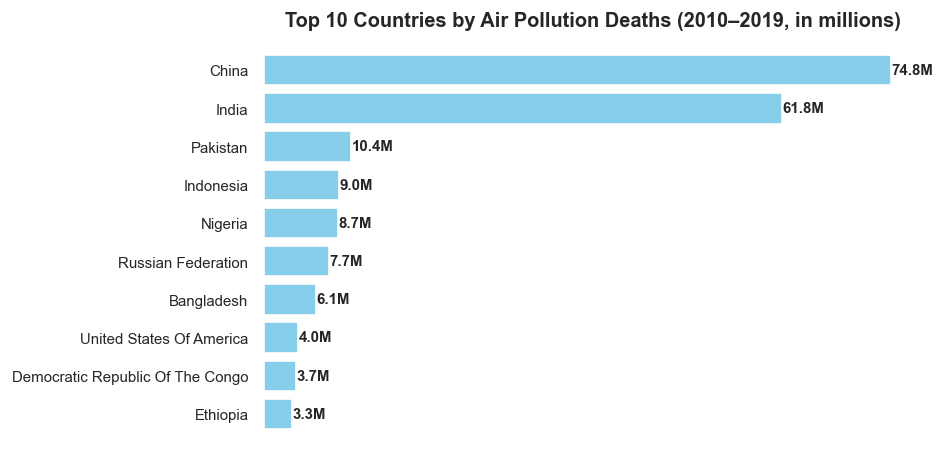

In [123]:
data = pollution_data.groupby("Country")["Deaths"].sum().reset_index()
data["Deaths"] /= 1_000_000
data = data.sort_values("Deaths", ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(data["Country"], data["Deaths"], color="skyblue")
for i, v in enumerate(data["Deaths"]):
    plt.text(v + 0.05, i, f"{v:.1f}M", va="center", fontsize=9, fontweight="bold")
plt.gca().invert_yaxis()
plt.title("Top 10 Countries by Air Pollution Deaths (2010–2019, in millions)",
          fontsize=12, fontweight="bold")
plt.xticks([]); plt.yticks(fontsize=9)
plt.box(False); plt.grid(False)
plt.tight_layout()
plt.show()


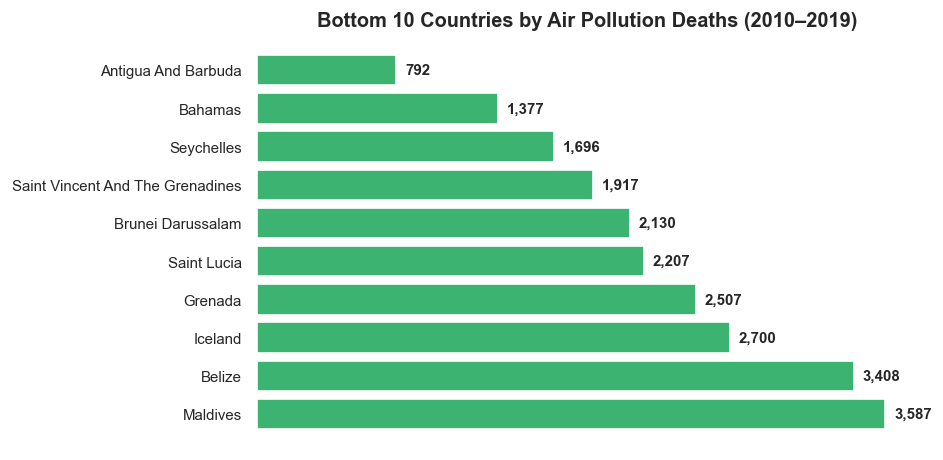

In [124]:
data = pollution_data.groupby("Country")["Deaths"].sum().reset_index()
data = data.sort_values("Deaths", ascending=True).head(10)
data = data.sort_values("Deaths", ascending=False)
plt.figure(figsize=(8,4))
plt.barh(data["Country"], data["Deaths"], color="mediumseagreen")
for i, v in enumerate(data["Deaths"]):
    plt.text(v + 50, i, f"{int(v):,}", va="center", fontsize=9, fontweight="bold")
plt.title("Bottom 10 Countries by Air Pollution Deaths (2010–2019)",
          fontsize=12, fontweight="bold")
plt.xticks([]); plt.yticks(fontsize=9)
plt.box(False); plt.grid(False)
plt.tight_layout()
plt.show()



#### deaths related to gender 

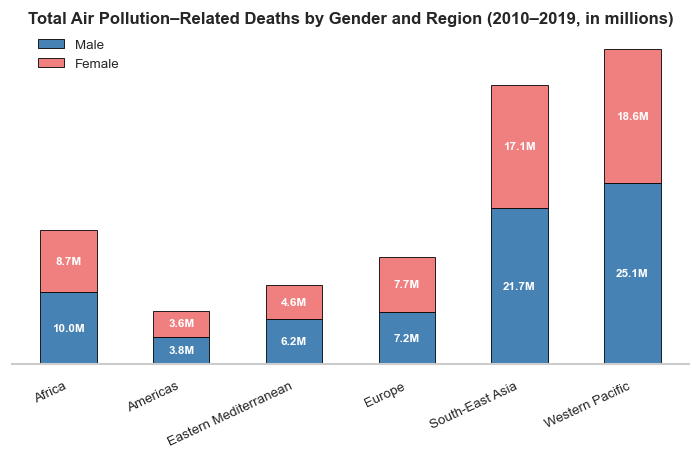

In [180]:

data = pollution_data.query("2010 <= Period <= 2019")
data = data.groupby(["Region", "Gender"])["Deaths"].sum().reset_index()
import pandas as pd
import matplotlib.pyplot as plt

data = pollution_data.query("2010 <= Period <= 2019")
data = data.groupby(["Region", "Gender"])["Deaths"].sum().reset_index()

pivot = data.pivot(index="Region", columns="Gender", values="Deaths").fillna(0)
pivot = pivot[["Male", "Female"]] / 1_000_000

ax = pivot.plot(kind="bar", stacked=True, figsize=(6,4),
                color=["steelblue", "lightcoral"], edgecolor="black", linewidth=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1fM", label_type="center",
                 fontsize=7, color="white", fontweight="bold")

plt.title("Total Air Pollution–Related Deaths by Gender and Region (2010–2019, in millions)",
          fontsize=10, fontweight="bold", pad=6)
plt.legend(loc="upper left", bbox_to_anchor=(0.02, 1.02), frameon=False, fontsize=8)
plt.xticks(rotation=25, ha="right", fontsize=8)
plt.yticks([]); plt.xlabel(""); plt.ylabel(""); plt.grid(False)

for spine in ['left', 'right', 'top']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()



#### global air quality

In [156]:
air_quality = (
    pd.read_csv("air_quality.csv", skiprows=4)
    .rename(columns={"Country Name": "Country", "Country Code": "Country_Code"})
    .melt(id_vars=["Country", "Country_Code"], value_vars=[str(y) for y in range(2010, 2020)],
          var_name="Period", value_name="PM2.5")
    .dropna(subset=["PM2.5"])
)
air_quality["Period"] = air_quality["Period"].astype(int)
print(air_quality.head())


                       Country Country_Code  Period      PM2.5
1  Africa Eastern and Southern          AFE    2010  28.195067
2                  Afghanistan          AFG    2010  49.679377
3   Africa Western and Central          AFW    2010  50.507893
4                       Angola          AGO    2010  24.178057
5                      Albania          ALB    2010  20.814110


In [158]:
import plotly.express as px
pm25_2019 = air_quality[air_quality["Period"] == 2019][["Country", "Country_Code", "PM2.5"]]
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ["<10 (Clean)", "10–20 (Moderate)", "20–30 (Poor)",
          "30–40 (Unhealthy)", "40–50 (Very Unhealthy)", ">50 (Hazardous)"]
pm25_2019["Category"] = pd.cut(pm25_2019["PM2.5"], bins=bins, labels=labels)

fig = px.choropleth(
    pm25_2019,
    locations="Country_Code",
    color="Category",
    hover_name="Country",
    color_discrete_sequence=["lightgreen", "mediumseagreen", "gold", "darkorange", "orange", "red"],
    title="Global Air Quality (PM2.5 Concentration, 2019)",
    projection="natural earth"
)

fig.update_layout(
    title_font=dict(size=16, family="Arial", color="black"),
    title_x=0.45,
    legend_title_text="PM2.5 Level (µg/m³)",
    legend=dict(x=0.88, y=1.1, font=dict(size=11)),
    margin=dict(l=20, r=20, t=60, b=20),
    width=950,
    height=500
)

fig.show()
